<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Владислав! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект.

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).


Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.

Расскажу как обычно проходит проверка:
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>

Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Проект

- Проект
- Описание Проекта
- Детальный План
- Библиотеки + Выгрузка Данных
- Исследовательский Анализ
- Обьединение Данных
- Юридические Ограничения
- CNN Извлечение Вектора
- Векторизация Текста
- NN + Hyperparameters tunning
- Функция Поиска
- Вывод

# Описание Проекта

Сервис. На запрос ввиде описания фотографии сервис представлает фотографии похожие по смыслу. <br/>
<br/>
Извлекать смысл из описания будем с помощью векторизации. <br/>
Сверточная сеть будет извлекать смысл из фотографий. <br/>
Нужно найти сеть которая будет предсказывать если описание подходит фотографии. <br/>

# Детальный План

Предобработка данных до разбития на валидационный датасет<br/>
(оценка экспертов, юридические ограничения, лемматизация, векторизация изображений)<br/>
Предобработка данных после разбития на валидационный датасет (векторизация текста)<br/>
Линейная регрессия<br/>
Перебор разных нейронных моделей<br/>

# Библиотеки + Выгрузка Данных

In [ ]:
import os
import random
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spacy
spacy.load('en_core_web_sm')
import en_core_web_sm

from tqdm import tqdm
tqdm.pandas()

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

from sklearn.model_selection import GroupShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import tensorflow as tf

from PIL import Image

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [ ]:
np.random.seed(2023)
random.seed(2023)

In [ ]:
DATASETS_FOLDER = 'datasets'
CURRENT_DIRECTORY = os.getcwd()
PATH_TO_DATA = os.path.join(CURRENT_DIRECTORY, DATASETS_FOLDER)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:


  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием path, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).

Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз.


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Правда, у пользователей мака есть тенденция забывать про винду. Спасибо за совет 🙂

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [ ]:
os.listdir('./datasets')

['test_images',
 'test_images.csv',
 '.DS_Store',
 'train_dataset.csv',
 'ExpertAnnotations.tsv',
 'CrowdAnnotations.tsv',
 'train_images',
 'test_queries.csv']

In [ ]:
test_images = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_images.csv'))
test_images = test_images.rename(columns={'image':'file_name'})
test_images.sample(3)

,file_name
56,782401952_5bc5d3413a.jpg
12,2885891981_6b02620ae9.jpg
68,957682378_46c3b07bcd.jpg


In [ ]:
train_dataset = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_dataset.csv'))
train_dataset = train_dataset.rename(columns={'image':'file_name'})
train_dataset.sample(3)

,file_name,query_id,query_text
1345,2421446839_fe7d46c177.jpg,533483374_86c5d4c13e.jpg#2,a dog on the beach .
2741,2913965136_2d00136697.jpg,2813033949_e19fa08805.jpg#2,A white and black dog is jumping in the air tr...
3914,2902269566_419d9f1d8e.jpg,2340206885_58754a799a.jpg#2,Three dogs in the snow .


In [ ]:
ExpertAnnotations = pd.read_csv(os.path.join(PATH_TO_DATA, 'ExpertAnnotations.tsv'), sep='\t',
                                names=['file_name', 'query_id', 'score_1', 'score_2', 'score_3'])
ExpertAnnotations.sample(3)

,file_name,query_id,score_1,score_2,score_3
4690,3593392955_a4125087f6.jpg,2723477522_d89f5ac62b.jpg#2,3,3,3
161,1287073593_f3d2a62455.jpg,2708686056_1b8f356264.jpg#2,1,1,1
4999,3720366614_dfa8fe1088.jpg,2963573792_dd51b5fbfb.jpg#2,1,1,1


In [ ]:
CrowdAnnotations = pd.read_csv(os.path.join(PATH_TO_DATA, 'CrowdAnnotations.tsv'), sep='\t',
                                names=['file_name', 'query_id', 'score_1', 'score_2', 'score_3'])
CrowdAnnotations.sample(3)

,file_name,query_id,score_1,score_2,score_3
27453,3214573346_d3a57f0328.jpg,3128164023_ebe8da4c32.jpg#2,0.000000,0,3
18079,2796801478_8ebd7e550b.jpg,2868575889_2c030aa8ae.jpg#2,0.333333,1,2
14017,2549968784_39bfbe44f9.jpg,539751252_2bd88c456b.jpg#2,0.333333,1,2


In [ ]:
CrowdAnnotations = CrowdAnnotations.rename(columns={'score_1':'positive_ratio',
                                                    'score_2':'positive_count',
                                                    'score_3':'negative_count'})

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Названия колонок должны быть корректными и говорящими сами за себя.

Сейчас названия колонок 'score_1', 'score_2', 'score_3' выглядят как будто три разных разметчика оставляли оценки. Тем не менее их природа совершенно другая.


3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.


Советую выбрать более информативные имена.

</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Верно 👍

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [ ]:
test_queries = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_queries.csv'), sep='|', index_col=0)
test_queries = test_queries.rename(columns={'image':'file_name'})
test_queries.sample(3)

,query_id,query_text,file_name
134,2517284816_9b8fd3c6b6.jpg#4,Middle school aged kids are showing their scho...,2517284816_9b8fd3c6b6.jpg
56,2060031241_a3ae7a06bb.jpg#1,a baby is holding a controller to a video game...,2060031241_a3ae7a06bb.jpg
299,3351418768_596ef7fd6f.jpg#4,A woman in purple with two children in the mou...,3351418768_596ef7fd6f.jpg


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
К сожалению здесь ты оставил хардкод путей и мне пришлось править код что-бы продолжить проверку
</div>

# Предобработка Данных + Исследовательский Анализ

<div style="padding:1rem;background:aqua;">
    Проверим выбросы и ошибки
</div>

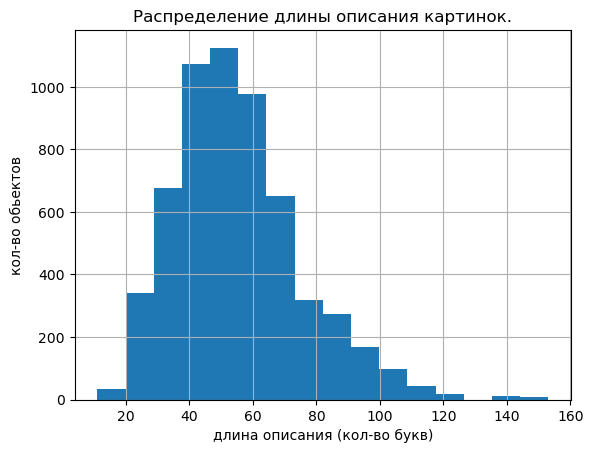

In [ ]:
train_dataset.query_text.str.len().hist(bins=16)
plt.title('Распределение длины описания картинок.')
plt.xlabel('длина описания (кол-во букв)')
plt.ylabel('кол-во обьектов')
plt.show()

Несмотря на то что данных мала в диапазоне 120-140, они не выглядят как выбросы.

In [ ]:
ExpertAnnotations.describe()

,score_1,score_2,score_3
count,5822.000000,5822.000000,5822.000000
mean,1.436620,1.624356,1.881999
std,0.787084,0.856222,0.904087
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000


Видно, что все данные находятся в правильном диапазоне.

In [ ]:
CrowdAnnotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       47830 non-null  object 
 1   query_id        47830 non-null  object 
 2   positive_ratio  47830 non-null  float64
 3   positive_count  47830 non-null  int64  
 4   negative_count  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


Проверил если правельный формат данных

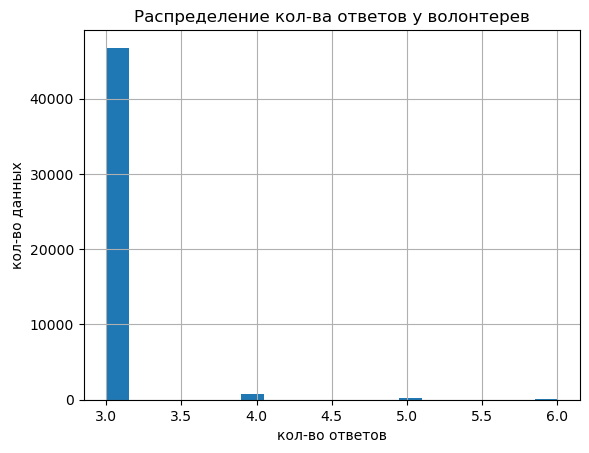

In [ ]:
(CrowdAnnotations.positive_count + CrowdAnnotations.negative_count).hist(bins=20)
plt.title('Распределение кол-ва ответов у волонтерев')
plt.xlabel('кол-вo ответов')
plt.ylabel('кол-вo данных')
plt.show()

Тут видно что минимальное кол-во ответов 3, а выбросы не особо важны.

In [ ]:
print('Изображения в обучающем наборе {}, количество уникальных {}.'.format(
            train_dataset.shape[0], len(pd.unique(train_dataset.file_name))
        ))
print('Изображения в тестирующем наборе {}, количество уникальных {}.'.format(
            test_images.shape[0], len(pd.unique(test_images.file_name))
        ))

Изображения в обучающем наборе 5822, количество уникальных 1000.
Изображения в тестирующем наборе 100, количество уникальных 100.


In [ ]:
print('Запросы в обучающем наборе {}, количество уникальных {}.'.format(
            train_dataset.shape[0], len(pd.unique(train_dataset.query_text))
        ))
print('Запросы в обучающем наборе {}, количество уникальных {}.'.format(
            test_queries.shape[0], len(pd.unique(test_queries.query_text))
        ))

Запросы в обучающем наборе 5822, количество уникальных 977.
Запросы в обучающем наборе 500, количество уникальных 500.


In [ ]:
print('Количество оценок в экспертном наборах {}. \nКоличество оценок в краудсорсинговом наборе {}.'.format(
            ExpertAnnotations.shape[0], CrowdAnnotations.shape[0]
        ))

Количество оценок в экспертном наборах 5822. 
Количество оценок в краудсорсинговом наборе 47830.


Описание ExpertAnnotations: <br/>
1. Имя файла
2. Идентификатор описнания <br/>
3-5 Оценки по шкале 1-4 <br/>
<br/>

Описание CrowdAnnotations: <br/>
1. Имя файла
2. Идентификатор описания
3. Доля людей, подтвердивших, что описание соответсвует изображению
4. Количество человек, подтвердивших, что описание соответствует изображению
5. Количество человек, подтвердивших, что описание не соответствует изображению

<div style="padding:1rem;background:aqua;">
    - Далее мы будем использовать 'train_dataset' как данные на входе в нейронную модель оценки <br/>
    - Оценки 'ExpertAnnotations' и 'CrowdAnnotations' приведем к доле 0-1 и это будем выходным значением <br/>
    - 'test_images' и 'test_queries' будем использовать при тестировании функции поиска <br/>
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В целом вижу что знакомство с данными состоялось. Нужно написать выводы. Обозначу, на какие вопросы было бы интересно увидеть ответ.:

  - Количество уникальных изображений в обучающем и тестовом наборах
  - Количество уникальных запросов
  - Количество оценок в экспертном и краудсорсинговом наборах.
  - Что представляют из себя экспертные оценки, что представляют из себя краудсорсинговые оценки

Выводы о том, с какими данными мы продолжим работу.
 </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Добавил выше 👍

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

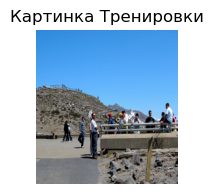

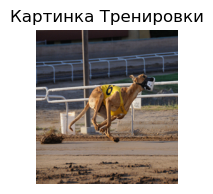

In [ ]:
for example_image in train_dataset.file_name.sample(2):
    im = Image.open(os.path.join(PATH_TO_DATA, 'train_images', example_image))
    im = im.resize((224, 244))
    im_array = np.array(im)
    plt_1 = plt.figure(figsize=(2, 2))
    plt.imshow(im_array)
    plt.title('Картинка Тренировки')
    plt.axis('off')
    plt.show()

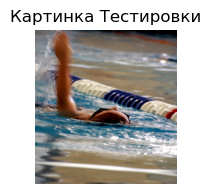

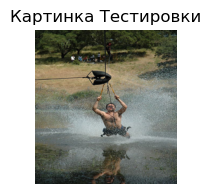

In [ ]:
for example_image in train_dataset.file_name.sample(2):
    im = Image.open(os.path.join(PATH_TO_DATA, 'train_images', example_image))
    im = im.resize((224, 244))
    im_array = np.array(im)
    plt_1 = plt.figure(figsize=(2, 2))
    plt.imshow(im_array)
    plt.title('Картинка Тестировки')
    plt.axis('off')
    plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Также было бы интересно познакомиться с изображениями, входящми в датасет
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Добавил выше 👍

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

# Обьединение Данных

Описание ExpertAnnotations: <br/>
1. Имя файла
2. Идентификатор описнания <br/>
3-5 Оценки по шкале 1-4

Описание CrowdAnnotations: <br/>
1. Имя файла
2. Идентификатор описания
3. Доля людей, подтвердивших, что описание соответсвует изображению
4. Количество человек, подтвердивших, что описание соответствует изображению
5. Количество человек, подтвердивших, что описание не соответствует изображению

<div style="padding:1rem;background:aqua;">
    - Так как оценка соотвествия у нашей модели будем шкала 0-1, нам нужны похожие данные. <br/>
    - Оценки экспертов можно обьеденить в одну среднюю оценку, потом поменять по формуле (x-1)/3. <br/>
    - Оценку волонтерев можно считать как долю. А важность будет 30% по отношению к экспертам.
</div>

In [ ]:
prompt_score = ExpertAnnotations.copy()

In [ ]:
prompt_score['score'] = prompt_score.score_1 + prompt_score.score_2 + prompt_score.score_3

In [ ]:
# divide by 3 (3 summed scores), divide by 3 (ratio 0-1)
prompt_score.score = prompt_score.score.apply(lambda x: ((x/3) - 1)/3)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, вижу приведение средней оценки к диапазону 0-1.</div>

In [ ]:
prompt_score = prompt_score.drop(columns=['score_1', 'score_2', 'score_3'])

In [ ]:
prompt_score.sample(3)

,file_name,query_id,score
3676,3281078518_630a7a7f4f.jpg,3514019869_7de4ece2a5.jpg#2,0.000000
3368,3214885227_2be09e7cfb.jpg,136886677_6026c622eb.jpg#2,0.666667
2297,2844641033_dab3715a99.jpg,2929506802_5432054d77.jpg#2,0.333333


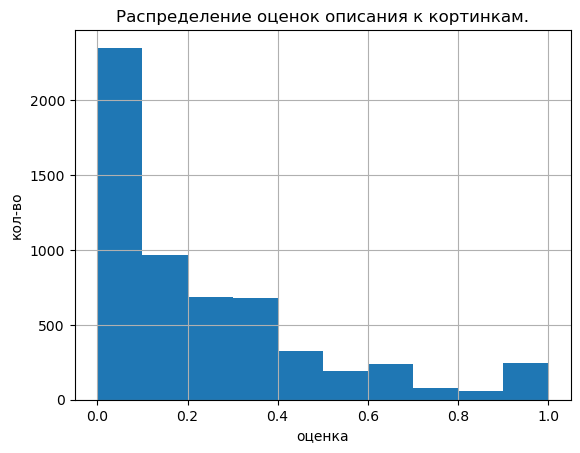

In [ ]:
prompt_score.score.hist()
plt.title('Распределение оценок описания к кортинкам.')
plt.xlabel('оценка')
plt.ylabel('кол-во')
plt.show()

In [ ]:
step = pd.merge(prompt_score, CrowdAnnotations, how='left', on=['query_id', 'file_name'])

In [ ]:
step.head()

,file_name,query_id,score,positive_ratio,positive_count,negative_count
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0.0,0.0,3.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.111111,0.0,0.0,3.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.111111,NaN,NaN,NaN
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.222222,NaN,NaN,NaN
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,0.111111,NaN,NaN,NaN


Где есть волонтерские данные соеденим их с важностью 30%, а где нет, оставим прежнюю оценку.

In [ ]:
def join_scores(row):
    if not math.isnan(row.positive_ratio):
        return row.score * 0.7 + row.positive_ratio * 0.3
    return row.score

step.score = step.apply(lambda row: join_scores(row), axis=1)

In [ ]:
step.head()

,file_name,query_id,score,positive_ratio,positive_count,negative_count
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0.0,0.0,3.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.077778,0.0,0.0,3.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.111111,NaN,NaN,NaN
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.222222,NaN,NaN,NaN
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,0.111111,NaN,NaN,NaN


In [ ]:
prompt_score = step.drop(columns=['positive_ratio', 'positive_count', 'negative_count'])

In [ ]:
df = pd.merge(prompt_score, train_dataset, on=['query_id', 'file_name'], how='inner')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   file_name   5822 non-null   object 
 1   query_id    5822 non-null   object 
 2   score       5822 non-null   float64
 3   query_text  5822 non-null   object 
dtypes: float64(1), object(3)
memory usage: 182.1+ KB


In [ ]:
df.head()

,file_name,query_id,score,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.077778,A girl wearing a yellow shirt and sunglasses s...
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.111111,A man sleeps under a blanket on a city street .
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.222222,A woman plays with long red ribbons in an empt...
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,0.111111,Chinese market street in the winter time .


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На самом деле если ты внимательно посмотришь пары в тестовом датафрейме, то окажется, что они идеально соответствуют друг другу. Это хоршо видно, если сопоставить file_name и query_id (или просто сопоставить изображения и описания).

И это стоило сделать на этапе знакомства с данными.

А известные описания (экспертные или краудсорс) конечно же не относятся к тестовым данным.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Я не совсем понял этот фидбек. Какие пары соответствуют? Две колонки выше я соединил данные по query_id + file_name. И там видно что file_name не соответствует query_id.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
<b>v2</b>    

Прости если запутал.
    
Смотри, на прошлой итерации ты пробовал мерджить тестовый датафрейм с крауд и экспетными оценами и не получилось пересечение. Что вполне логично, для тестовых данных оценки мы не знаем.
    
Но если внимательно посмотреть на структуру тестового датасета, то окажется что все пары в нем идеально соответствуют друг другу. При желании все можнопоставить оценку 1 (максимальное соответствие).    
    
</div>

<div style="padding:1rem;background:aqua;">
    - Видно что нет оценки экспертов для тестированых запросов, надо будет делить тренировачные данные. <br/>
</div>

# Юридические Ограничения

<div style="padding:1rem;background:aqua;">
    - Векторизируем текст простым способом. Лемматизируем слова, извлечем BagOfWords и TF-IDF. <br/>
    - До того как мы векторизируем текст, будет легко найти данные с юридическими ограничениями. <br/>
</div>

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
doc = nlp("I am hanging out in a green garden")
print([(token.lemma_, token.pos_) for token in doc])

[('I', 'PRON'), ('be', 'AUX'), ('hang', 'VERB'), ('out', 'ADP'), ('in', 'ADP'), ('a', 'DET'), ('green', 'ADJ'), ('garden', 'NOUN')]


Для того чтобы извлечь смысл нам только нужен 'VERB' & 'NOUN' & 'ADJ'.

In [ ]:
def extract_lemma(text):
    doc = nlp(text)
    out = []
    for token in doc:
        if token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADJ':
            out.append(token.lemma_)
    return out

In [ ]:
df['text_lemma'] = df.query_text.progress_apply(lambda x: extract_lemma(x))

100%|██████████████████████████████████████| 5822/5822 [00:30<00:00, 190.53it/s]


In [ ]:
df.head(15)

,file_name,query_id,score,query_text,text_lemma
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...,"[young, child, wear, blue, goggle, sit, float,..."
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.077778,A girl wearing a yellow shirt and sunglasses s...,"[girl, wear, yellow, shirt, sunglass, smile]"
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.111111,A man sleeps under a blanket on a city street .,"[man, sleep, blanket, city, street]"
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.222222,A woman plays with long red ribbons in an empt...,"[woman, play, long, red, ribbon, empty, square]"
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,0.111111,Chinese market street in the winter time .,"[chinese, market, street, winter, time]"
5,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,0.000000,A soccer ball is above the head of a man weari...,"[soccer, ball, head, man, wear, black, short, ..."
6,1056338697_4f7d7ce270.jpg,3545652636_0746537307.jpg#2,0.000000,A young boy dressed in a red uniform kicks the...,"[young, boy, dress, red, uniform, kick, soccer..."
7,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,0.077778,A man and woman look back at the camera while ...,"[man, woman, look, camera, stand, front, red, ..."
8,106490881_5a2dd9b7bd.jpg,1425069308_488e5fcf9d.jpg#2,0.000000,A white dog jumps to catch a blue ball in a li...,"[white, dog, jump, catch, blue, ball, living, ..."
9,106490881_5a2dd9b7bd.jpg,1714316707_8bbaa2a2ba.jpg#2,0.333333,A little boy shakes the snow off of a tree .,"[little, boy, shake, snow, tree]"


<div style="padding:1rem;background:aqua;">
    - У нас теперь есть лист со словами, мы можем найти если в нем есть слова которые могут описивать людей младше 16 лет. <br/>
</div>

In [ ]:
underage_list = [
    'young',
    'youth',
    'minor',
    'adolescent',
    'teenager',
    'youngster',
    'child',
    'kid',
    'juvenile',
    'preteen',
    'teen',
    'junior',
    'youngling',
    'sprout',
    'offspring',
    'pupil',
    'infant',
    'toddler',
    'baby',
    'minion',
    'pubescent',
    'tween',
    'boy',
    'girl',
    'student'
]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [ ]:
underage_set = set(underage_list)

In [ ]:
def contains_underage_word(x):
    my_set = set(x)
    return len(my_set & underage_set) != 0

In [ ]:
df['underage_word'] = df.text_lemma.progress_apply(lambda x: contains_underage_word(x))

100%|███████████████████████████████████| 5822/5822 [00:00<00:00, 882931.55it/s]


In [ ]:
df.sample(5)

,file_name,query_id,score,query_text,text_lemma,underage_word
1835,2602085456_d1beebcb29.jpg,3655074079_7df3812bc5.jpg#2,0.311111,A naked woman wearing body paint riding a bicy...,"[naked, woman, wear, body, paint, ride, bicycle]",False
2301,2847615962_c330bded6e.jpg,3145967309_b33abe4d84.jpg#2,0.000000,A man in a white print shirt and a woman in a ...,"[man, white, print, shirt, woman, black, dress...",False
4902,3688858505_e8afd1475d.jpg,2876993733_cb26107d18.jpg#2,0.000000,Two lonely fans in green ponchos sit in a stad...,"[lonely, fan, green, ponchos, sit, stadium]",False
5306,476233374_e1396998ef.jpg,2256133102_e2c8314ecb.jpg#2,0.222222,An individual rappelling down a cliff towards ...,"[individual, rappel, cliff, water]",False
706,2073105823_6dacade004.jpg,2949982320_c704b31626.jpg#2,0.233333,A man is doing tricks with a bicycle at a skat...,"[man, do, trick, bicycle, skate, park]",False



<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Делать эту предобработку для тестового датасета преждевременно, т.к. весь функционал по обоработке текста (и поиска "детских слов" нужно будет делать "на лету".



</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Ок.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

<div style="padding:1rem;background:aqua;">
    - Выберем фотки с высоким качеством описания (0.7>=), а потом уберем фотки с детьми. <br/>
</div>

In [ ]:
index_to_drop = df[(df.score >= 0.7) & (df.underage_word)].index

In [ ]:
df.iloc[index_to_drop].head(3)

,file_name,query_id,score,query_text,text_lemma,underage_word
53,1131932671_c8d17751b3.jpg,1131932671_c8d17751b3.jpg#2,1.000000,A boy jumps from one bed to another .,"[boy, jump, bed]",True
54,1131932671_c8d17751b3.jpg,3245460937_2710a82709.jpg#2,0.766667,A child jumping on a tennis court .,"[child, jump, tennis, court]",True
77,1174525839_7c1e6cfa86.jpg,2295750198_6d152d7ceb.jpg#2,0.777778,a little girl kicks into the air .,"[little, girl, kick, air]",True


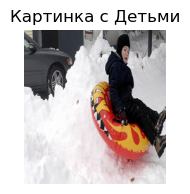

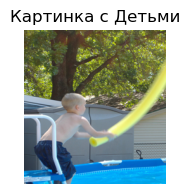

In [ ]:
for example_image in df.iloc[index_to_drop].file_name.sample(2):
    im = Image.open(os.path.join(PATH_TO_DATA, 'train_images', example_image))
    im = im.resize((224, 244))
    im_array = np.array(im)
    plt_1 = plt.figure(figsize=(2, 2))
    plt.imshow(im_array)
    plt.title('Картинка с Детьми')
    plt.axis('off')
    plt.show()

In [ ]:
file_names_to_drop = pd.unique(df.iloc[index_to_drop].file_name)

In [ ]:
print('Сколько уникальных фоток мы выбросим - {}.'.format(len(file_names_to_drop)))

Сколько уникальных фоток мы выбросим - 54.


In [ ]:
file_names_to_drop_set = set(file_names_to_drop)

In [ ]:
print('Сколько данных мы удалим - {}.'.format(
    df.file_name.isin(file_names_to_drop_set).sum()))
print('Процентное соотношение удалим - {:.2f}%'.format(
    df.file_name.isin(file_names_to_drop_set).sum() * 100 / df.shape[0]))

Сколько данных мы удалим - 302.
Процентное соотношение удалим - 5.19%


In [ ]:
df = df[df.file_name.isin(file_names_to_drop_set) == False].drop(columns=['underage_word']).reset_index(drop=True)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Ты удалил комментарии, в которых были запрещенные слова. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:

 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.


И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).

 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.





</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Исправил выше - выбрал фотки с высоким качеством описания (0.7>=), а потом убрал фотки с детьми.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [ ]:
df.head()

,file_name,query_id,score,query_text,text_lemma
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,A young child is wearing blue goggles and sitt...,"[young, child, wear, blue, goggle, sit, float,..."
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.077778,A girl wearing a yellow shirt and sunglasses s...,"[girl, wear, yellow, shirt, sunglass, smile]"
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.111111,A man sleeps under a blanket on a city street .,"[man, sleep, blanket, city, street]"
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.222222,A woman plays with long red ribbons in an empt...,"[woman, play, long, red, ribbon, empty, square]"
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,0.111111,Chinese market street in the winter time .,"[chinese, market, street, winter, time]"



<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Если выкидываешь строки из датафрейма не забывай показывать, сколько строк у тебя осталось. Удобнее всего это сделать через info()


</div>

# CNN Извлечение Вектора

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   file_name   5520 non-null   object 
 1   query_id    5520 non-null   object 
 2   score       5520 non-null   float64
 3   query_text  5520 non-null   object 
 4   text_lemma  5520 non-null   object 
dtypes: float64(1), object(4)
memory usage: 215.8+ KB


In [ ]:
data_gen = ImageDataGenerator(rescale=1./255)
data_flow = data_gen.flow_from_dataframe(
    df, os.path.join(PATH_TO_DATA, 'train_images'), x_col='file_name', y_col='score', class_mode='raw',
    target_size=(224,224))

Found 5520 validated image filenames.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
и здесь хардкод путей... выполнение кода прервалось
</div>

In [ ]:
backbone = ResNet50(include_top=False, weights='imagenet')
model = Sequential()
model.add(backbone)
model.add(GlobalAveragePooling2D())

Metal device set to: Apple M1 Pro


In [ ]:
X_vision = model.predict(data_flow)

2023-06-13 20:11:48.645394: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


173/173 [==============================] - 25s 140ms/step


In [ ]:
X_vision.shape

(5520, 2048)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Смотри какая огромная размерность получилась у эмбеддингов изображений. Работатьс такими векторами модели будет безумно сложно. Советую применить GlobalAveragePooling2D() (как в спринте по изображениям) и вектор признакоа будет вполне "рабочим" - 2048.

А работать с признаками длинной 100352 далеко не каждая машина выдержит (просто по объему оперативной памяти).
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Теперь лучше.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [ ]:
df['vision'] = pd.Series(list(X_vision))

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Если есть возможность - работай с нумпай массивами. Не нужно все переводить в датафреймы или series. "Родной" для машинного обучения тип - это нумпай масссивы. Датафреймы удобны для манипуляций с данными, но они сильно медленнее с точки зрения доступа к элементам и гораздо затратнее с точки зрения объема.  А при передачи в модели машинного обучения они все равно получают из датафреймов нумпай массив.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Я бы с радостью, но как потом GroupShuffleSplit преминить?

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> да, здесь ты прав. </div>

# Векторизация Текста

In [ ]:
df['text_lemma_joined'] = df.text_lemma.apply(lambda x: " ".join(x))

<div style="padding:1rem;background:aqua;">
    - На этом этапе можно разделить "df" на валидационную и тестировочные выборки. <br/>
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Конечно ты молодец, что заботишься об утечках и векторизацию делаешь на обучающих даных (значит теория из курса была усвоена).

Но для POC я не вижу критичных проблем если мы сделаем fit_transform на всех данных без разбиения.  Маловероятно что возникнут какие-то утечки, которые могут повлиять на качество модели.
</div>

In [ ]:
gss_test = GroupShuffleSplit(n_splits=1, train_size=.8)

In [ ]:
train_indices, valid_indices = next(gss_test.split(X=df, y=df, groups=df['file_name']))

In [ ]:
df_train, df_valid = df.loc[train_indices], df.loc[valid_indices]

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
И делить данные на три выборки это тоже перебор. Нужно выделить одну выборку, которую мы будем использовать как валидационную. А тестирование уже будем делать "визуально".
</div>

In [ ]:
df_train.shape

(4397, 7)

In [ ]:
df_valid.shape

(1123, 7)

In [ ]:
count_vect = CountVectorizer()

In [ ]:
X_train_count = count_vect.fit_transform(df_train.text_lemma_joined)

In [ ]:
X_train_count

<4397x1079 sparse matrix of type '<class 'numpy.int64'>'
	with 24528 stored elements in Compressed Sparse Row format>

In [ ]:
tf_idf = TfidfVectorizer()

In [ ]:
X_train_tfidf = tf_idf.fit_transform(df_train.text_lemma_joined)

In [ ]:
X_train_tfidf

<4397x1079 sparse matrix of type '<class 'numpy.float64'>'
	with 24528 stored elements in Compressed Sparse Row format>

In [ ]:
X_train = sp.hstack([X_train_count, X_train_tfidf])

In [ ]:
X_train

<4397x2158 sparse matrix of type '<class 'numpy.float64'>'
	with 49056 stored elements in Compressed Sparse Row format>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Необычное решение, давай посмотрим, к чему оно приведет.</div>

In [ ]:
X_valid = sp.hstack([count_vect.transform(df_valid.text_lemma_joined),
                     tf_idf.transform(df_valid.text_lemma_joined)])

#  NN + Hyperparameters tunning

<div style="padding:1rem;background:aqua;">
    - Проверим как будет работать линейная регрессия. (скорее всего будет работать очень плохо, связь нужно искать между параметрами)<br/>
    - Проверим RanfomForestRegressor.<br/>
    - Проверим как будут работать нейронные сети.<br/>
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Метрика качества у нас будет MAE. Она подходит для вычесления качества регрессии.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [ ]:
X_train = X_train.toarray()
X_train_vision = df_train.vision.to_numpy()
X_train_vision = np.vstack(X_train_vision)
X_train = np.concatenate((X_train, X_train_vision), axis=1)

In [ ]:
X_valid = X_valid.toarray()
X_valid_vision = df_valid.vision.to_numpy()
X_valid_vision = np.vstack(X_valid_vision)
X_valid = np.concatenate((X_valid, X_valid_vision), axis=1)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Здесь напрашивается небольшой вывод, хотя бы с указанием размерностей полученных признаков.
</div>

In [ ]:
X_train.shape

(4397, 4206)

In [ ]:
X_valid.shape

(1123, 4206)

In [ ]:
model_lr = LinearRegression()

In [ ]:
y_train = df_train.score

In [ ]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
z_valid = model_lr.predict(X_valid)

In [ ]:
y_valid = df_valid.score

In [ ]:
mean_absolute_error(y_valid, z_valid)

3690928844.4983106

In [ ]:
model_l = Lasso()
model_l.fit(X_train, y_train)
z_valid = model_l.predict(X_valid)
mean_absolute_error(y_valid, z_valid)

0.18560235230587863

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Видно что модель безумно "переобучеется". Попробуй взять её родственницу  с регуляризацией (lasso/ridge)</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Очень интересно. Как можно узнать про нестандартные виды моделей как (lasso/ridge)?

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 <b>v2</b>Сорри, был уверен что после спринта численные методы ты с ними знаком

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
    
Это линейная регрессия с l1/l2 регуляризацией   

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Я вижу что ты уже выбрал метрику mae, поэтому просто напиши обоснование для своего выбора.  </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Обосновал коротко и поделу.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [ ]:
forest_params = [{'max_depth': [5, 10], 'n_estimators': [1, 2]}]

In [ ]:
model_rf = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(estimator=model_rf, param_grid=forest_params, scoring='neg_mean_absolute_error')

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В этом проекте я бы не стал связываться с кросс-валидацией, тем более при наличии отдельной валидационной выборки.  Это может быть очень долго. </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Логично, есть какие нибудь техники чтобы быстро искать гиперпараметры иначе?

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> Рассматривай ту выборку, которую ты отрезал  с помощью  GroupShuffleSplit как валидационную и валидируйся по ней. А тестовая у нас вообще в отдельном файле была.</div>

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 10], 'n_estimators': [1, 2]}],
             scoring='neg_mean_absolute_error')

In [ ]:
print(grid_search.best_params_)

{'max_depth': 5, 'n_estimators': 2}


In [ ]:
print(grid_search.best_score_ * -1)

0.17594500831738608


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=2)

model_ff = tf.keras.Sequential()
model_ff.add(tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model_ff.add(tf.keras.layers.Dense(128, activation='relu'))
model_ff.add(tf.keras.layers.Dense(16, activation='relu'))
model_ff.add(tf.keras.layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.legacy.Adam()

model_ff.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    Не стоит хардкодить входную размерность. При любом "чихе" (минимальном изменении во входных данных) у тебя поменяется входная  размерность и придется её корректировать. Возьми её из признаков.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Хардкодить - самому себе вредить 😹

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Старайся количество нейронов в слое и размер батча привязывать к степени 2. Так оптимальнее с точки зрения испльзования ресурсов видеокарты. 1024...512...64...64... 16....8 </div>

In [ ]:
model_ff.fit(X_train, y_train,
             validation_data=(X_valid, y_valid),
             epochs=40, callbacks=[callback], verbose=2)

Epoch 1/40
138/138 - 2s - loss: 0.1677 - mae: 0.1677 - val_loss: 0.1741 - val_mae: 0.1741 - 2s/epoch - 13ms/step
Epoch 2/40
138/138 - 1s - loss: 0.1614 - mae: 0.1614 - val_loss: 0.1750 - val_mae: 0.1750 - 1s/epoch - 8ms/step
Epoch 3/40
138/138 - 1s - loss: 0.1551 - mae: 0.1551 - val_loss: 0.1895 - val_mae: 0.1895 - 1s/epoch - 8ms/step
Epoch 4/40
138/138 - 1s - loss: 0.1547 - mae: 0.1547 - val_loss: 0.1674 - val_mae: 0.1674 - 1s/epoch - 8ms/step
Epoch 5/40
138/138 - 1s - loss: 0.1512 - mae: 0.1512 - val_loss: 0.1675 - val_mae: 0.1675 - 1s/epoch - 8ms/step
Epoch 6/40
138/138 - 1s - loss: 0.1487 - mae: 0.1487 - val_loss: 0.1744 - val_mae: 0.1744 - 1s/epoch - 8ms/step
Epoch 7/40
138/138 - 1s - loss: 0.1486 - mae: 0.1486 - val_loss: 0.1674 - val_mae: 0.1674 - 1s/epoch - 8ms/step
Epoch 8/40
138/138 - 1s - loss: 0.1476 - mae: 0.1476 - val_loss: 0.1670 - val_mae: 0.1670 - 1s/epoch - 8ms/step
Epoch 9/40
138/138 - 1s - loss: 0.1462 - mae: 0.1462 - val_loss: 0.1689 - val_mae: 0.1689 - 1s/epoch - 

In [ ]:
print('RandomForestRegressor: ', mean_absolute_error(y_valid, grid_search.best_estimator_.predict(X_valid)))

RandomForestRegressor:  0.1829187973475436


In [ ]:
print('Feed-forward neural network: ', mean_absolute_error(y_valid, model_ff.predict(X_valid)))

36/36 [==============================] - 0s 3ms/step
Feed-forward neural network:  0.16931618953498984


In [ ]:
model_best = model_ff

In [ ]:
X_valid

array([[0.        , 0.        , 0.        , ..., 2.4916718 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.88568735, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.4916718 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 2.41800332, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.26967573, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.94256449, 0.        ,
        0.        ]])

In [ ]:
np.reshape(X_valid[0], (1, -1))

array([[0.       , 0.       , 0.       , ..., 2.4916718, 0.       ,
        0.       ]])

In [ ]:
model_best.predict(np.reshape(X_valid[0], (1, -1)))

1/1 [==============================] - 0s 44ms/step


array([[0.29145736]], dtype=float32)

<div style="padding:1rem;background:aqua;">
    - Feed Forward Neural Net показал лучший результат.<br/>
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Здесь я не буду "злобствовать" но подумай, насколько корректно сравнивать оценки на кросс-валидации и на валидационой выборке. Получается что ты сравниваешь модели на разных наборах данных. С этим и может быть связано преимущество леса.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Даже если в этом разница, то у кросс-валидации меньше данных, что вызвало бы худший результат?

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
<b>v2</b>    
Просто разные наборы данных для обучения и валидации и оценки моделей могут различаться из за этого.  Как в одну так и другую сторону.    
</div>

# Функция Поиска

<div style="padding:1rem;background:aqua;">
    - Выберем 8 queries.<br/>
    - Прогоним test_images, test_queries, по нашей схеме.<br/>
    - Выведем результат поиска.<br/>
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я вижу, что ты делаешь векторизацию изображений каждый раз при каждом запросе. Но это очень неоптимально вычислительно. Гораздо оптимальнее посчитать эмбеддинги изображений заранее. А вот векторизацию текста уже делать "на лету".</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Логично. Проведу векторизацию и добавлю в test_images.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [ ]:
def process_text_age_restiction(text):
    text_lemma = extract_lemma(text)
    return contains_underage_word(text_lemma)

In [ ]:
def process_images(df):
    df = df.copy()
    df['score_fake'] = 0
    data_gen = ImageDataGenerator(rescale=1./255)
    data_flow = data_gen.flow_from_dataframe(
        df, directory=os.path.join(PATH_TO_DATA, 'test_images'), x_col='file_name', y_col='score_fake', class_mode='raw',
        target_size=(224,224))
    backbone = ResNet50(include_top=False, weights='imagenet')
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    X_vision = model.predict(data_flow)
    X_vision = np.array([x.flatten() for x in X_vision])
    df['vision'] = pd.Series(list(X_vision))
    return df

In [ ]:
def process_text(text):
    text_lemma = extract_lemma(text)
    text_lemma_joined = " ".join(text_lemma)
    return sp.hstack([count_vect.transform([text_lemma_joined]),
                      tf_idf.transform([text_lemma_joined])]).toarray()[0]

In [ ]:
def score_query(vision, text):
    return model_best.predict(np.reshape(np.concatenate((text, vision)), (1, -1)), verbose=0)[0][0]

In [ ]:
test_images = process_images(test_images)

Found 100 validated image filenames.
4/4 [==============================] - 2s 275ms/step


In [ ]:
def deep_image_search(query):
    is_restricted_query = process_text_age_restiction(query)
    if is_restricted_query:
        print('This image is unavailable in your country in compliance with local laws.')
    else:
        df_search = test_images.copy()
        text = process_text(query)
        df_search['score'] = df_search.vision.apply(lambda x: score_query(x, text))
        best_idx = df_search.score.idxmax()
        best_image = df_search.iloc[best_idx]
        im = Image.open(os.path.join(PATH_TO_DATA, 'test_images', best_image.file_name))
        im = im.resize((224, 224))
        im_array = np.array(im)
        plt.imshow(im_array)
        plt.title('{} {:2f}'.format(query, best_image.score))
        plt.axis('off')
        plt.show()

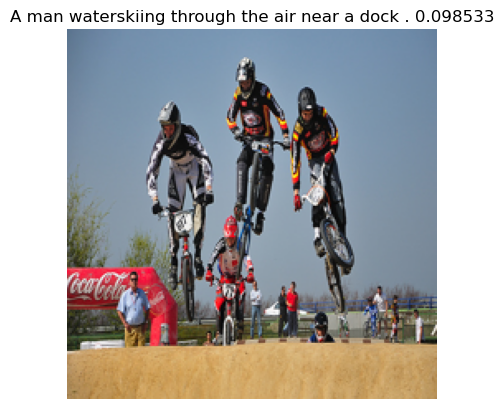

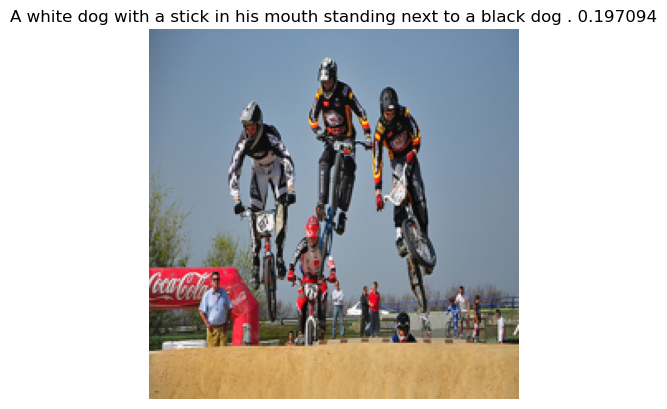

This image is unavailable in your country in compliance with local laws.


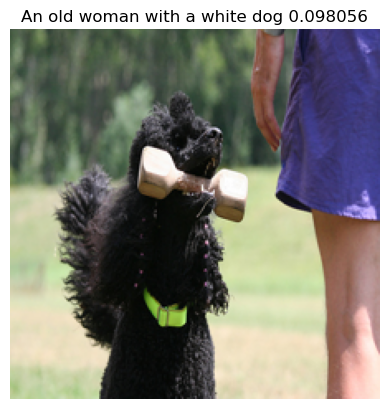

This image is unavailable in your country in compliance with local laws.


In [ ]:
for query in test_queries.query_text.sample(5):
    deep_image_search(query)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Небольшая формальность - пожалуйста добавь в код функции инфереса, чтобы она кроме изображения и текста  выводила найденную меру близости.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Появились разные фото, но похоже что мой метод векторизации текста не достаточно достает информации.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> Пойми, объем данных небольшой, признаки "постоянные", не дообучаются в процесе. Хорошо что хоть картинки разные.. Про другие подходы я тебе уже писал. Тот же CLIP обучался во первых end-to-end (т.е. обучались и фича экстракторы), а во вторых там были сотни миллионов размеченных пар.</div>

# Вывод

<div style="padding:1rem;background:aqua;">
    - Поиск выводит одни и те же картинки.<br/>
    - PoC не прошла. Есть вероятность что модель как то не так натренировалась, но мне кажется я все сделал правильно.<br/>
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты прав, к сожалению работают они не очень. И причин тут несколько - мало данных, не очень правильный подход. На мой взгляд более перспективным было бы привести ембеддинги изображений и текстов к одной размерности в одно пространство (через обучаемые слои) и в качестве меры близости использовать косинусное расстояние.

Из того, что я вижу, полход с конкатинацией работает очень слабо, но иногда получается обучить модель, если брать признаки, полученные текста, полученные с помощью BERT.  И использовать достаточно мощные нейронки.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html


</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Подведем итоги. Я вижу, что в целом с проектом ты справляешься.

Получены признаки из текста и изображений, обучена модель регрессии. Да, модель не работает, но по опыту скажу, что не каждая гипотеза подтверждается экспериментально. Ты проверил один из вариантов и похоже он не работает. Значит команда может отработать другие подходы.

Что нужно доделать обязательно:

 - пожалуйста избавься от хардкода путей
 - пожалуйста дополни выводы в разделе разведочный анализ
 - нужно обосновать выор метрики mae
 - нужно уменьшить размерность вектора ембеддинга изображений
 - нужно добавить в функию инференса вывод степени близости между изображением и текстом

Желтые комментарии на твое усмотрение.

Жду твою работу на повторное ревью.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>
Пожалуйста подчисти код от хардкода путей.
    
И если позволяют время и силы попробоуй запустить CLIP. С библиотекой, которую я тебе дал это не сложно, зато работает круто.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>

Совсем опаздываю, я самостоятельно попробую CLIP после выпуска)

</div>